# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhamad Alhadid Fadillah
- **Email:** alhadidfadillah@gmail.com
- **ID Dicoding:** alhadid623

## Menentukan Pertanyaan Bisnis

- Di bulan apa, rental sepeda terbanyak pada tahun 2011 sampai 2012?
- Di musim apa, rental sepeda terbanyak pada tahun 2011 dan tahun 2012?
- Berapa perbandingan antara *casual users* dan *registered users* pada rental sepeda dari tahun 2011 sampai 2012?

## Import Semua Packages/Library yang Digunakan

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Memuat semua tabel yang dibutuhkan.

Memuat data rental sepeda per hari.

In [8]:
hari_df = pd.read_csv("/content/day.csv", delimiter=",")
hari_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Memuat data rental sepeda per jam dalam sehari.

In [9]:
jam_df = pd.read_csv("/content/hour.csv", delimiter=",")
jam_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Menilai kualitas dari seluruh data yang digunakan.

Menilai kualitas data rental sepeda per hari.

In [10]:
hari_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Terlihat tidak ada *missing value* pada kolom data tersebut. Akan tetapi, agar mempermudah kita dalam menjawab pertanyaan bisnis yang kita buat, alangkah baiknya kita mengubah tipe data musim (*season*) dan tipe data bulan (*month*) menjadi tipe *category*.

In [11]:
hari_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Terlihat tidak ada *missing value* pada kolom tersebut.

In [12]:
print("Jumlah duplikasi: ", hari_df.duplicated().sum())

Jumlah duplikasi:  0


Dari kode di atas, dapat disimpulkan bahwa tidak ada data yang terduplikat.

In [13]:
hari_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Setelah memeriksa parameter statistik dari kolom numerik yang terdapat pada *hari_df*, sepertinya tidak ada keanehan dari data tersebut.

Menilai kualitas data rental sepeda per jam dalam sehari.

In [14]:
jam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [15]:
jam_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [16]:
print("Jumlah duplikasi: ", jam_df.duplicated().sum())

Jumlah duplikasi:  0


In [17]:
jam_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Terlihat juga tidak ada keanehan pada data *jam_df*.

Pada tahap ini, kita sudah mengidentifikasi permasalahan pada data yang kita punya. Kesimpulannya adalah:


1.   Mengubah tipe data musim (*season*) menjadi tipe *category*.
2.   Mengubah tipe data bulan (*month*) menjadi tipe *category*.



### Cleaning Data

Sekarang, kita membersihkan atau menyelesaikan masalah yang telah didapatkan pada proses *assessing data*.

In [18]:
hari_df['season'] = hari_df.season.astype('category')
hari_df['mnth'] = hari_df.mnth.astype('category')

In [19]:
hari_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     731 non-null    int64   
 1   dteday      731 non-null    object  
 2   season      731 non-null    category
 3   yr          731 non-null    int64   
 4   mnth        731 non-null    category
 5   holiday     731 non-null    int64   
 6   weekday     731 non-null    int64   
 7   workingday  731 non-null    int64   
 8   weathersit  731 non-null    int64   
 9   temp        731 non-null    float64 
 10  atemp       731 non-null    float64 
 11  hum         731 non-null    float64 
 12  windspeed   731 non-null    float64 
 13  casual      731 non-null    int64   
 14  registered  731 non-null    int64   
 15  cnt         731 non-null    int64   
dtypes: category(2), float64(4), int64(9), object(1)
memory usage: 82.1+ KB


In [20]:
hari_df.season.replace((1,2,3,4), ('Spring', 'Summer', 'Fall', 'Winter'), inplace=True)
hari_df.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'), inplace=True)
hari_df.yr.replace((0,1), (2011,2012), inplace=True)

Pada kode di atas, kita sudah berhasil menyelesaikan masalah yang telah diidentifikasi sebelumnya sehingga kita akan mudah menjawab pertanyaan yang kita buat pada awal proyek ini. Dapat dilihat juga bahwa kita sudah mengubah nilai-nilai pada kolom musim dan bulan yang awalnya dalam bentuk *int* menjadi *str* sehingga akan memudahkan kita pada proses analisis data selanjutnya, serta kita juga mengubah nilai tahun yang awalnya masih 0 dan 1 menjadi 2011 dan 2012.

## Exploratory Data Analysis (EDA)

Selanjutnya, kita akan melakukan proses *Exploratory Data Analysis* (EDA). Kita melakukan proses ini untuk menjawab pertanyaan-pertanyaan yang sudah kita buat sebelumnya, yaitu:
- Di bulan apa, rental sepeda terbanyak pada tahun 2011 sampai 2012?
- Di musim apa, rental sepeda terbanyak pada tahun 2011 dan tahun 2012?
- Berapa perbandingan antara *casual users* dan *registered users* pada rental sepeda dari tahun 2011 sampai 2012?

### Explore ...

Mencari rental sepeda terbanyak pada tahun 2011 berdasarkan bulan.

In [21]:
hari_df[hari_df['yr'] == 2011].groupby(by="mnth")['cnt'].sum().sort_values(ascending=False)

mnth
Jun    143512
Jul    141341
Aug    136691
May    135821
Sep    127418
Oct    123511
Nov    102167
Apr     94870
Dec     87323
Mar     64045
Feb     48215
Jan     38189
Name: cnt, dtype: int64

Mencari rental sepeda terbanyak pada tahun 2012 berdasarkan bulan.

In [22]:
hari_df[hari_df['yr'] == 2012].groupby(by="mnth")['cnt'].sum().sort_values(ascending=False)

mnth
Sep    218573
Aug    214503
Jul    203607
Jun    202830
Oct    198841
May    195865
Apr    174224
Mar    164875
Nov    152664
Dec    123713
Feb    103137
Jan     96744
Name: cnt, dtype: int64

Mencari rental sepeda terbanyak pada tahun 2011 berdasarkan musim.

In [23]:
hari_df[hari_df['yr'] == 2011].groupby(by="season")['cnt'].sum().sort_values(ascending=False)

season
Fall      419650
Summer    347316
Winter    326137
Spring    150000
Name: cnt, dtype: int64

Mencari rental sepeda terbanyak pada tahun 2012 berdasarkan musim.

In [24]:
hari_df[hari_df['yr'] == 2012].groupby(by="season")['cnt'].sum().sort_values(ascending=False)

season
Fall      641479
Summer    571273
Winter    515476
Spring    321348
Name: cnt, dtype: int64

Menghitung total pengguna *casual* dan *registered* dari tahun 2011 sampai 2012.

In [25]:
casual_users = hari_df['casual'].sum()
registered_users = hari_df['registered'].sum()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

- Di bulan apa, rental sepeda terbanyak pada tahun 2011 sampai 2012?
- Di musim apa, rental sepeda terbanyak pada tahun 2011 dan tahun 2012?

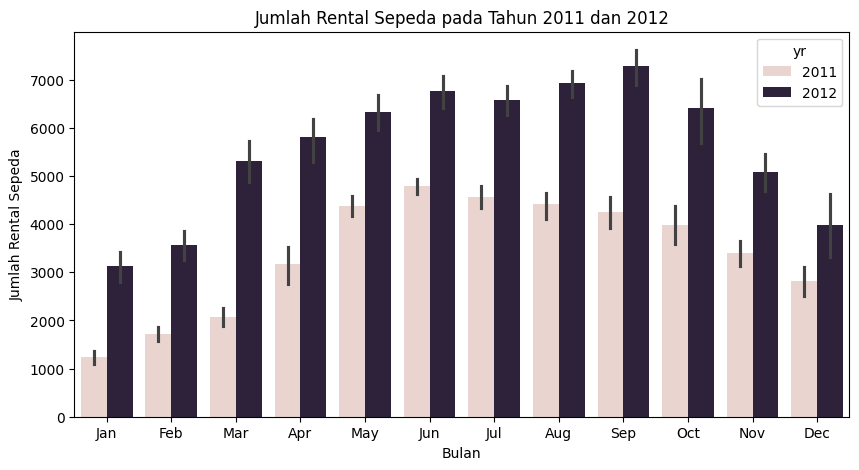

In [26]:
plt.figure(figsize=(10,5))

sns.barplot(x='mnth', y='cnt', data=hari_df, hue='yr')

plt.xlabel("Bulan")
plt.ylabel("Jumlah Rental Sepeda")
plt.title("Jumlah Rental Sepeda pada Tahun 2011 dan 2012")

plt.show()

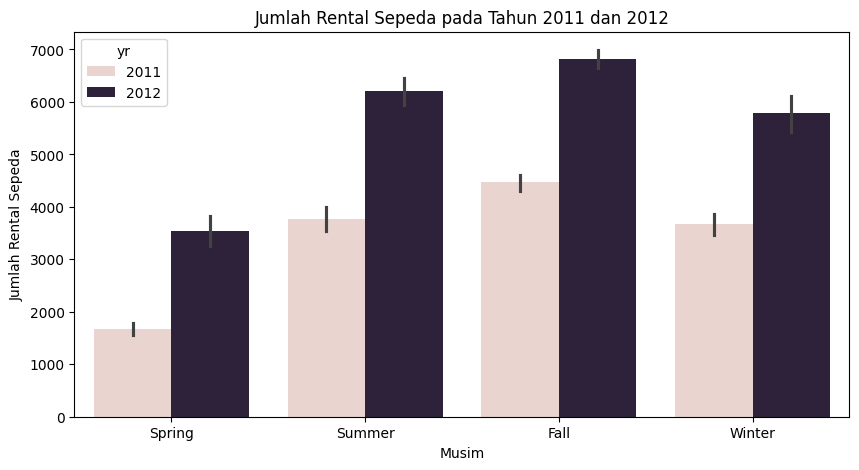

In [27]:
plt.figure(figsize=(10,5))

sns.barplot(x='season', y='cnt', data=hari_df, hue='yr')

plt.xlabel("Musim")
plt.ylabel("Jumlah Rental Sepeda")
plt.title("Jumlah Rental Sepeda pada Tahun 2011 dan 2012")

plt.show()

### Pertanyaan 2:

- Berapa perbandingan antara *casual users* dan *registered users* pada rental sepeda dari tahun 2011 sampai 2012?

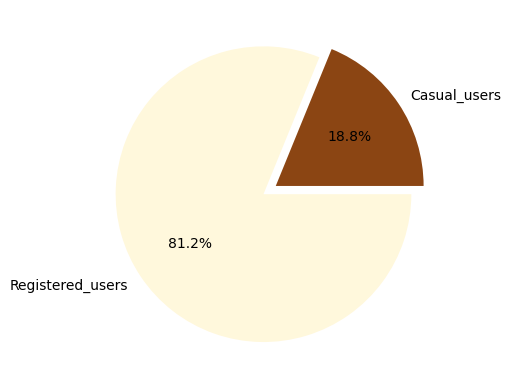

In [28]:
jenis_pengguna = ('Casual_users', 'Registered_users')
jumlah_pengguna = (casual_users, registered_users)
colors = ('#8B4513', '#FFF8DC')
explode = (0.1, 0)

plt.pie(
    x=jumlah_pengguna,
    labels=jenis_pengguna,
    autopct='%1.1f%%',
    colors=colors,
    explode=explode
)
plt.show()

## Conclusion

- Conclution pertanyaan 1:
Pada tahun 2011, jumlah rental sepeda terbanyak terjadi pada bulan Juni dan musim Fall. Sedangkan pada tahun 2012, jumlah rental sepeda terbanyak terjadi pada bulan September dan musim Fall. Dengan demikian, perlu diperbanyak jumlah rental sepeda yang disediakan pada waktu tersebut mengingat *demand* yang cukup tinggi.
- Conclution pertanyaan 2:
Dari tahun 2011 sampai tahun 2012, jumlah *Registered Users* jauh lebih banyak dibandingkan dengan jumlah *Casual Users*.

In [30]:
hari_df.to_csv("all_data.csv", index=False)